<img src="http://oproject.org/tiki-download_file.php?fileId=8&display&x=450&y=128">
<img src="http://files.oproject.org/tmvalogo.png" height="50%" width="50%">

# TMVA  Variable Importance Example 

Example of finding the importance of the input variables by training and test the classifier using various combination of the input variables

### Input Data File

In [1]:
auto inputFile = TFile::Open("Higgs_data.root");

In [2]:
inputFile->ls();

TFile**		Higgs_data.root	
 TFile*		Higgs_data.root	
  KEY: TTree	sig_tree;1	tree
  KEY: TTree	bkg_tree;1	tree


## Declare DataLoader

First we need to declare a DataLoader and add the variables (passing the variable names used in the test and train trees in input dataset). To add variable names to DataLoader we use the AddVariable function. Arguments of this function:

1. String containing the variable name. Using ":=" we can add definition too.

2. String (label to variable, if not present the variable name will be used) or character (defining the type of data points)

3. If we have label for variable, the data point type still can be passed as third argument 

Example: 

loader.AddVariable( "myvar1 := var1+var2", 'F' )


In [3]:
TMVA::DataLoader loader("dataset");

// add variables to loader 
loader.AddVariable("m_jj");
loader.AddVariable("m_jjj");
loader.AddVariable("m_lv");
loader.AddVariable("m_jlv");
loader.AddVariable("m_bb");
loader.AddVariable("m_wbb");
loader.AddVariable("m_wwbb");

TMVA::gConfig().SetDrawProgressBar( false);

## Setup Dataset(s)

To pass the signal and background trees to DataLoader we use the AddSignalTree and AddBackgroundTree functions, and we set up the corresponding DataLoader using the  *PrepareTrainingAndTestTree* function. 
With the *PrepareTrainingAndTestTree*  we can specify the number of event used for training and testing. 
In this case, we use a very small number (e.g. 500), since we will repeat the train and test procedure several times 

In [4]:
TCut mycuts;
TCut mycutb;

auto tsignal =  (TTree*) inputFile->Get("sig_tree");
auto tbackground =  (TTree*) inputFile->Get("bkg_tree");

loader.AddSignalTree    (tsignal,     1.0);   //signal weight  = 1
loader.AddBackgroundTree(tbackground, 1.0);   //background weight = 1 


loader.PrepareTrainingAndTestTree(mycuts, mycutb,
                                  "nTrain_Signal=1000:nTrain_Background=1000:nTest_Signal=1000:nTest_Background=1000:"
                                  "SplitMode=Random:NormMode=NumEvents:!V" );


DataSetInfo              : [dataset] : Added class "Signal"
                         : Add Tree sig_tree of type Signal with 10000 events
DataSetInfo              : [dataset] : Added class "Background"
                         : Add Tree bkg_tree of type Background with 10000 events


## Variable Importance

Run now the variable importance algorithm which will perform a train and test on different variables random combinations. 
By looking at the different performance obtained one can extract the importance of each single variable 

In [5]:
TMVA::VariableImportance vi(&loader);

#### Book method
Define the method we want to use for the variable importance

In [6]:
vi.BookMethod(TMVA::Types::kBDT, "BDT",
             "V:NTrees=500:MinNodeSize=2.5%:MaxDepth=3:BoostType=AdaBoost:AdaBoostBeta=0.5:"
             "UseBaggedBoost:BaggedSampleFraction=0.5:SeparationType=GiniIndex:nCuts=20" );


#### Run the algorithm
Run here the VariableImportance algorithm. Be patient it may take some time....

In [7]:

TStopwatch tw; tw.Start();
//vi.SetType(TMVA::kRandom)
vi.SetType(TMVA::kShort);

vi.Evaluate();
tw.Print();

                         : Evaluation done.
Real time 0:03:10, CP time 365.450


#### Get the result
Retrieve the obtained result in terms of importance of each variable. Visualize also the variable importance in an histogram.

                         : Variable Importance Results (Short)
                         : VariableImportance: 1
                         : m_bb: 31.6528 % 
                         : m_jj: 4.2711 % 
                         : m_jjj: 15.5057 % 
                         : m_jlv: 11.0998 % 
                         : m_lv: 1.05222 % 
                         : m_wbb: 18.426 % 
                         : m_wwbb: 17.9925 % 


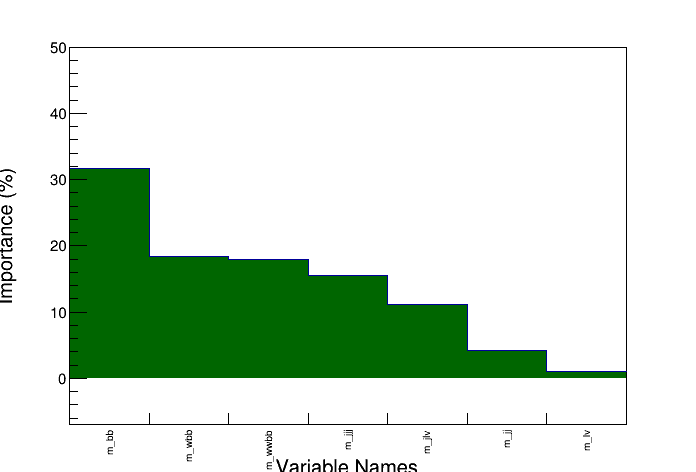

In [8]:
auto results=vi.GetResults();
results.Print();
results.Draw();
gPad->Draw();